# Mini Project (SCE Team 26)

## Dataset 3 : The Movie Database APIs



U2020964E MUHAMAD AMIRUDDIN BIN NORAZMI

U2020143J POH HONG JIE

U2020175G YEO WEI CHEONG




Source : https://www.themoviedb.org/

Documentation : https://developers.themoviedb.org/3/getting-started/introduction


Reference:
1. https://en.wikipedia.org/wiki/Lists_of_film_remakes - List of film remakes

In [83]:
# Libraries
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import requests # to make TMDB API calls
import locale   # to format currency as USD

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression

sb.set()

#Set format for float to be $ because selected columns are currency
pd.options.display.float_format = '{:,.2f}'.format

### Fetch data from TMDB with the API Key 

Requested the API key from The Movie DB

For example: https://api.themoviedb.org/3/discover/movie?api_key=+++&sort_by=popularity.desc

The API key is not shown due security reason.

In [84]:
api_key = 'bd31d307e12fa2d62fda2130baec4357'

response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key='+api_key+'&primary_release_year=2017&sort_by=revenue.desc')

highest_revenue = response.json() # store parsed json response
highest_revenue_films = highest_revenue['results']

# define column names for our new dataframe
columns = ['film', 'revenue']

# create dataframe with film and revenue columns
df = pd.DataFrame(columns=columns)

# for each of the highest revenue films make an api call for that specific movie to return the budget and revenue
for film in highest_revenue_films:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    # print(locale.currency(film_revenue['revenue'], grouping=True ))
    df.loc[len(df)]=[film['title'],film_revenue['revenue']] # store title and revenue in our dataframe 
    
df.head()

,film,revenue
0,Star Wars: The Last Jedi,1332539889
1,Beauty and the Beast,1263521126
2,The Fate of the Furious,1238764765
3,Despicable Me 3,1031552585
4,Jumanji: Welcome to the Jungle,962102237


In [85]:
response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&sort_by=revenue.desc')
highest_revenue_ever = response.json()
highest_revenue_films_ever = highest_revenue_ever['results']

columns = ['film', 'revenue', 'budget', 'release_date']
highest_revenue_ever_df = pd.DataFrame(columns=columns)

for film in highest_revenue_films_ever:

    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()

    if film_revenue['budget'] > 281:
        # add film title, revenue, budget and release date to the dataframe
        highest_revenue_ever_df.loc[len(highest_revenue_ever_df)]=[film['title'],film_revenue['revenue'], (film_revenue['budget'] * -1), film_revenue['release_date']]

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue

Source of the data set is from https://www.kaggle.com/tmdb/tmdb-movie-metadatab

In [86]:
movies_df = pd.read_excel('MovieDataset.xlsx')
movies_df.head(5) # by default, it returns the first five

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,is_remake,inflation_rate,year_difference
0,23437,tt1179056,1.07,35000000,115664037,A Nightmare on Elm Street,Jackie Earle Haley|Katie Cassidy|Kyle Gallner|...,http://www.nightmareonelmstreet.com/,Samuel Bayer,Never Sleep Again.,...,New Line Cinema|Platinum Dunes,4/30/10,423,5.50,2010,"35,000,000.00","115,664,037.00",Y,nan,nan
1,377,tt0087800,1.33,1800000,25504513,A Nightmare on Elm Street,John Saxon|Ronee Blakley|Heather Langenkamp|Am...,NaN,Wes Craven,"If Nancy Doesn't Wake Up Screaming, She Won't ...",...,New Line Cinema|Smart Egg Pictures,11/15/84,625,7.10,1984,"3,778,275.67","53,535,044.98",Y,nan,nan
2,1965,tt0120787,1.04,60000000,128038368,A Perfect Murder,Michael Douglas|Gwyneth Paltrow|Viggo Mortense...,NaN,Andrew Davis,A powerful husband. An unfaithful wife. A jeal...,...,Kopelson Entertainment|Warner Bros.,6/4/98,158,6.30,1998,"80,261,728.14","171,276,344.74",y,nan,34.00
3,14644,tt0423877,0.09,0,0,Boudu,GÃ©rard Depardieu|Catherine Frot|GÃ©rard Jugno...,NaN,GÃ©rard Jugnot,NaN,...,Novo Arturo Films|DD Productions|TF1 Films Pro...,3/9/05,14,5.00,2005,0.00,0.00,y,nan,19.00
4,1058,tt0085276,0.66,0,19910002,Breathless,Richard Gere|ValÃ©rie Kaprisky|Art Metrano|Joh...,NaN,Jim McBride,He's the last man on earth any woman needs - b...,...,Orion Pictures|Breathless Associates|Miko Prod...,5/13/83,32,5.80,1983,0.00,"43,589,206.25",y,nan,23.00


In [87]:
print("The dimensions of the dataset")
movies_df.shape

The dimensions of the dataset


(10866, 24)

In [88]:
print("The information about the data types")
movies_df.dtypes

The information about the data types


id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
is_remake                object
inflation_rate          float64
year_difference         float64
dtype: object

In [89]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [90]:
# this provides you with statistical information about the data
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,inflation_rate,year_difference
count,"10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00",0.00,79.00
mean,"66,064.18",0.65,"14,625,701.09","39,823,319.79",102.07,217.39,5.97,"2,001.32","17,551,039.82","51,364,363.25",nan,24.94
std,"92,130.14",1.00,"30,913,213.83","117,003,486.58",31.38,575.62,0.94,12.81,"34,306,155.72","144,632,485.04",nan,15.76
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,"1,960.00",0.00,0.00,nan,2.00
25%,"10,596.25",0.21,0.00,0.00,90.00,17.00,5.40,"1,995.00",0.00,0.00,nan,9.00
50%,"20,669.00",0.38,0.00,0.00,99.00,38.00,6.00,"2,006.00",0.00,0.00,nan,26.00
75%,"75,610.00",0.71,"15,000,000.00","24,000,000.00",111.00,145.75,6.60,"2,011.00","20,853,251.08","33,697,095.72",nan,36.00
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",900.00,"9,767.00",9.20,"2,015.00","425,000,000.00","2,827,123,750.41",nan,64.00


In [91]:
# This returns a Pandas Dataframe with the sums of logical True values (i.e. null value) for each columns 
null_count_df = movies_df.isnull().sum().reset_index()

# Define column labels for null_count
null_count_df.columns = ['column_name', 'null_count']

# Calculate the percentage of missing values
null_count_df['null_%'] = null_count_df['null_count']/len(movies_df)*100

# Display the columns in descending order of the percentage of missing values
null_count_df.sort_values('null_%', ascending=False).reset_index(drop=True)

,column_name,null_count,null_%
0,inflation_rate,10866,100.00
1,year_difference,10787,99.27
2,homepage,7930,72.98
3,tagline,2824,25.99
4,keywords,1493,13.74
5,production_companies,1030,9.48
6,cast,76,0.70
7,director,44,0.40
8,genres,23,0.21
9,imdb_id,10,0.09


This table shows that there are quite a few of data columns that has null or missing values. The data set needs to clean up and eliminate these missing values before we start to analyze the data set. These columns will be dropped or deleted

In [92]:
# this returns the number of unique values in each column
movies_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5066
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
is_remake                   3
inflation_rate              0
year_difference            40
dtype: int64

## Clean The Dataset

Columns that are not needed will be deleted

For budget_adj, revenue_adj, and runtime change zero values to NaN (Not a Number)

Duplicate rows will be droped

The release_date datatype will be changed from string to datetime

In [93]:
# list of columns that are to be deleted/dropped
# col = ['id', 'imdb_id', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview','genres','production_companies']

# deleting the columns
# movies_df.drop(col, axis = 1, inplace = True)

#checking to see if the columns have been deleted
#movies_df.head()

### Replace Zeros with NaN and then drop rows with NaN

NaN stands for Not A Number and is one of the common ways to represent the missing value in the data. It is a special floating-point value and cannot be converted to any other type than float. NaN value is one of the major problems in Data Analysis. It is very essential to deal with NaN in order to get the desired results.

In [94]:
# replace zeros with NaN and recheck number of NaNs
# movies_df = movies_df.replace(0, np.nan)

# x =  movies_df.isnull().sum().sum()

# We print x
# print('Number of NaN values in our DataFrame:', x)

In [95]:
# check number of rows
# movies_df.shape

In [96]:
# Removing the rows with NaN values since they will not help our analysis
# movies_df.dropna(axis = 0, inplace = True)

# recheck number of rows after removing
# movies_df.shape

### Drop duplicate row

In [97]:
# drop duplicates
movies_df.drop_duplicates(inplace=True)

# confirm correction by rechecking for duplicates in the data (output should be 0)
sum(movies_df.duplicated())

0

### Change release_date to datetype

In [98]:
# change and check to confirm change occurred
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10789 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10821 non-null  object        
 9   tagline               8041 non-null   object        
 10  keywords              9372 non-null   object        
 11  overview              10861 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres          

In [99]:
# Format categorical value for is_remake into uppercase.
movies_df['is_remake'] = movies_df['is_remake'].str.upper() 

# movies_df.dropna(subset=['genres'], inplace=True)

# Split the genres delimited by pipesign for each of the genre a movie falls into
s = movies_df['genres'].str.split('|').apply(pd.Series, 1).stack()

s.index = s.index.droplevel(-1)
s.name = 'genres'

# Create additional columns for genre, We will restrict per movie to at most 2 genres classification
movies_df['genres_1'] = movies_df['genres']
movies_df['genres_2'] = movies_df['genres']

# Overwriting the value directly will incur warning.
# Reference: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
#            https://stackoverflow.com/questions/51082752/how-to-modify-value-in-a-pandas-series
for m in range(0, movies_df.size):
    genre_data = s.get(m)
    if (genre_data is None):
        pass
    elif type(genre_data) is str:
        movies_df.loc[m, 'genres_1'] = genre_data
        movies_df.loc[m, 'genres_2'] = float('NaN')
    else:
        movies_df.loc[m, 'genres_1'] = genre_data.values[0]
        movies_df.loc[m, 'genres_2'] = genre_data.values[1]       

# Delete original column, create a new 1.
del movies_df['genres']

movies_df.head()

# # save clean df to file as backup
# movies_data.to_csv('tmdb-movies-clean.csv', index=False)

# # quick look at updated stats for clean dataset
# movies_data.describe()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,is_remake,inflation_rate,year_difference,genres_1,genres_2
0,23437,tt1179056,1.07,35000000,115664037,A Nightmare on Elm Street,Jackie Earle Haley|Katie Cassidy|Kyle Gallner|...,http://www.nightmareonelmstreet.com/,Samuel Bayer,Never Sleep Again.,...,423,5.50,2010,"35,000,000.00","115,664,037.00",Y,nan,nan,Horror,Mystery
1,377,tt0087800,1.33,1800000,25504513,A Nightmare on Elm Street,John Saxon|Ronee Blakley|Heather Langenkamp|Am...,NaN,Wes Craven,"If Nancy Doesn't Wake Up Screaming, She Won't ...",...,625,7.10,1984,"3,778,275.67","53,535,044.98",Y,nan,nan,Horror,NaN
2,1965,tt0120787,1.04,60000000,128038368,A Perfect Murder,Michael Douglas|Gwyneth Paltrow|Viggo Mortense...,NaN,Andrew Davis,A powerful husband. An unfaithful wife. A jeal...,...,158,6.30,1998,"80,261,728.14","171,276,344.74",Y,nan,34.00,Crime,Thriller
3,14644,tt0423877,0.09,0,0,Boudu,GÃ©rard Depardieu|Catherine Frot|GÃ©rard Jugno...,NaN,GÃ©rard Jugnot,NaN,...,14,5.00,2005,0.00,0.00,Y,nan,19.00,Comedy,NaN
4,1058,tt0085276,0.66,0,19910002,Breathless,Richard Gere|ValÃ©rie Kaprisky|Art Metrano|Joh...,NaN,Jim McBride,He's the last man on earth any woman needs - b...,...,32,5.80,1983,0.00,"43,589,206.25",Y,nan,23.00,Action,Drama


The data set has been trimmed and clean. We are ready to move on for exploratory data analysis/visualization to gather relevant insights

### Exploratory Data Analysis

In [100]:
# Only keep columns that are needed for further analysis.
# NOTE: Columns after release_year are non-numeric.
movies_col = movies_df[
    ['popularity','budget_adj','revenue_adj', 'runtime', 
     'vote_count','vote_average','release_year', 'is_remake', 
     'original_title', 'genres_1', 'genres_2']
]

# Extract another set of columns with all the movie for remake categorization
non_remake_cols = movies_col[movies_col['is_remake'] == 'N']
non_remake_cols.head()

,popularity,budget_adj,revenue_adj,runtime,vote_count,vote_average,release_year,is_remake,original_title,genres_1,genres_2
360,0.36,0.00,"100,051,648.28",119,48,6.70,1979,N,...And Justice for All,Crime,Drama
361,1.22,0.00,"1,497,553.12",99,274,6.60,2014,N,'71,Thriller,Action
362,3.24,"7,623,003.26","61,718,613.20",95,1778,7.30,2009,N,(500) Days of Summer,Comedy,Drama
363,0.71,0.00,0.00,87,80,6.30,2004,N,(T)Raumschiff Surprise - Periode 1,Comedy,Science Fiction
364,0.68,0.00,"124,910,637.06",106,117,6.20,1987,N,*batteries not included,Comedy,Family


In [130]:
remake_cols = movies_col[movies_col['is_remake'] == 'Y']
remake_cols

,popularity,budget_adj,revenue_adj,runtime,vote_count,vote_average,release_year,is_remake,original_title,genres_1,genres_2
0,1.07,"35,000,000.00","115,664,037.00",95,423,5.50,2010,Y,A Nightmare on Elm Street,Horror,Mystery
1,1.33,"3,778,275.67","53,535,044.98",91,625,7.10,1984,Y,A Nightmare on Elm Street,Horror,NaN
2,1.04,"80,261,728.14","171,276,344.74",107,158,6.30,1998,Y,A Perfect Murder,Crime,Thriller
3,0.09,0.00,0.00,104,14,5.00,2005,Y,Boudu,Comedy,NaN
4,0.66,0.00,"43,589,206.25",100,32,5.80,1983,Y,Breathless,Action,Drama
...,...,...,...,...,...,...,...,...,...,...,...
355,1.35,"27,914,082.24","43,605,214.26",119,195,6.30,2005,Y,The Sisterhood of the Traveling Pants,Drama,Comedy
356,0.45,"27,345,239.11","44,919,535.11",117,127,6.00,2008,Y,The Sisterhood of the Traveling Pants 2,Adventure,Comedy
357,0.10,0.00,0.00,83,10,5.30,1965,Y,The Skull,Thriller,Horror
358,0.85,"18,994,381.72","44,329,315.98",106,88,5.90,2000,Y,The Skulls,Crime,Drama


Draw histogram distribution for comparison between remake and non-remake movies.

Based on the plots, most of the variables are skewed. *vote_average* is probably the closest to normal distribution.

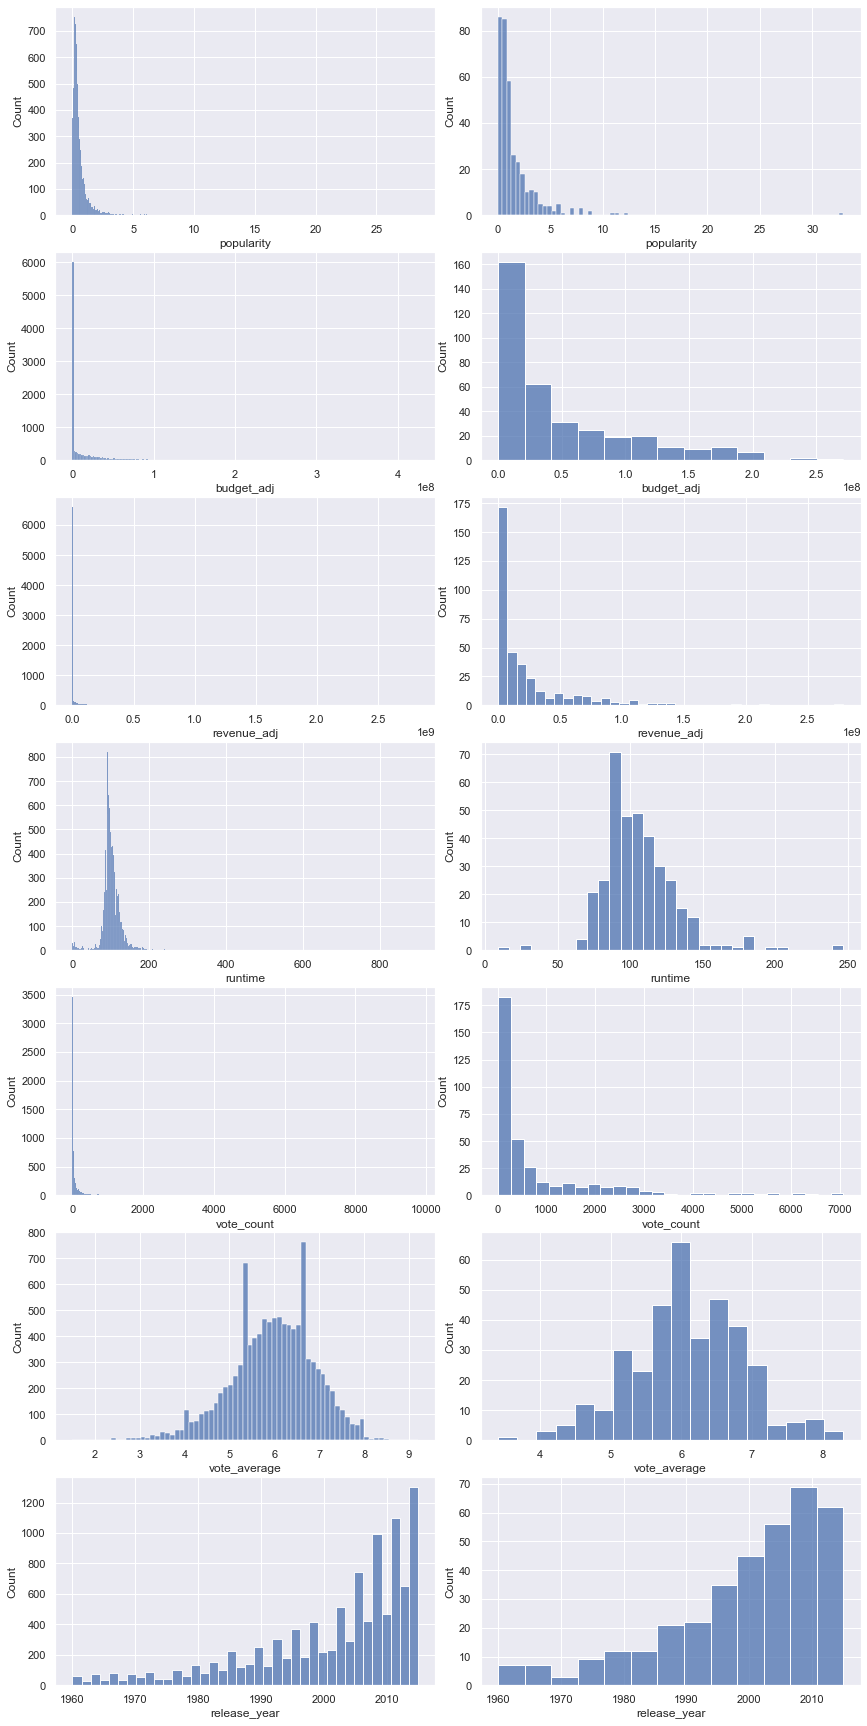

In [102]:
# Draw the distributions of all variables
f, axes = plt.subplots(7, 2, figsize=(12, 24))
f.tight_layout()

count = 0
for var in movies_col:
    if var == 'is_remake': break
    sb.histplot(data = non_remake_cols[var], ax = axes[count, 0])
    sb.histplot(data = remake_cols[var], ax = axes[count, 1])
    count += 1

Using a categorization plot to get an overview of how many movies within the datasets are remake.

Ratio of the classes Y : N = {ratio.loc['Y']} : {ratio.loc['N']}


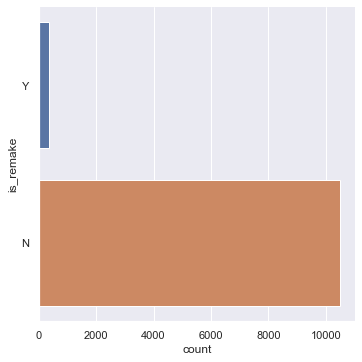

In [103]:
# Show amount of remakes and non remakes
ratio = movies_df['is_remake'].value_counts()
sb.catplot(y = 'is_remake', data = movies_df, kind = 'count')

print("Ratio of the classes Y : N = {ratio.loc['Y']} : {ratio.loc['N']}")

We will look at what type of movie genres that are usually remake

In [104]:
# Group movies by genre using title as unique identifier and display all genres.
genre_kind = pd.unique(remake_cols[['genres_1', 'genres_2']].dropna().values.ravel('K'))

print('Total genres:', len(genre_kind))
print(genre_kind)

Total genres: 17
['Horror' 'Crime' 'Action' 'Family' 'Drama' 'War' 'Adventure' 'Comedy'
 'Romance' 'Animation' 'Thriller' 'Fantasy' 'Mystery' 'Science Fiction'
 'Music' 'Documentary' 'History']


<AxesSubplot:xlabel='genres_2', ylabel='genres_1'>

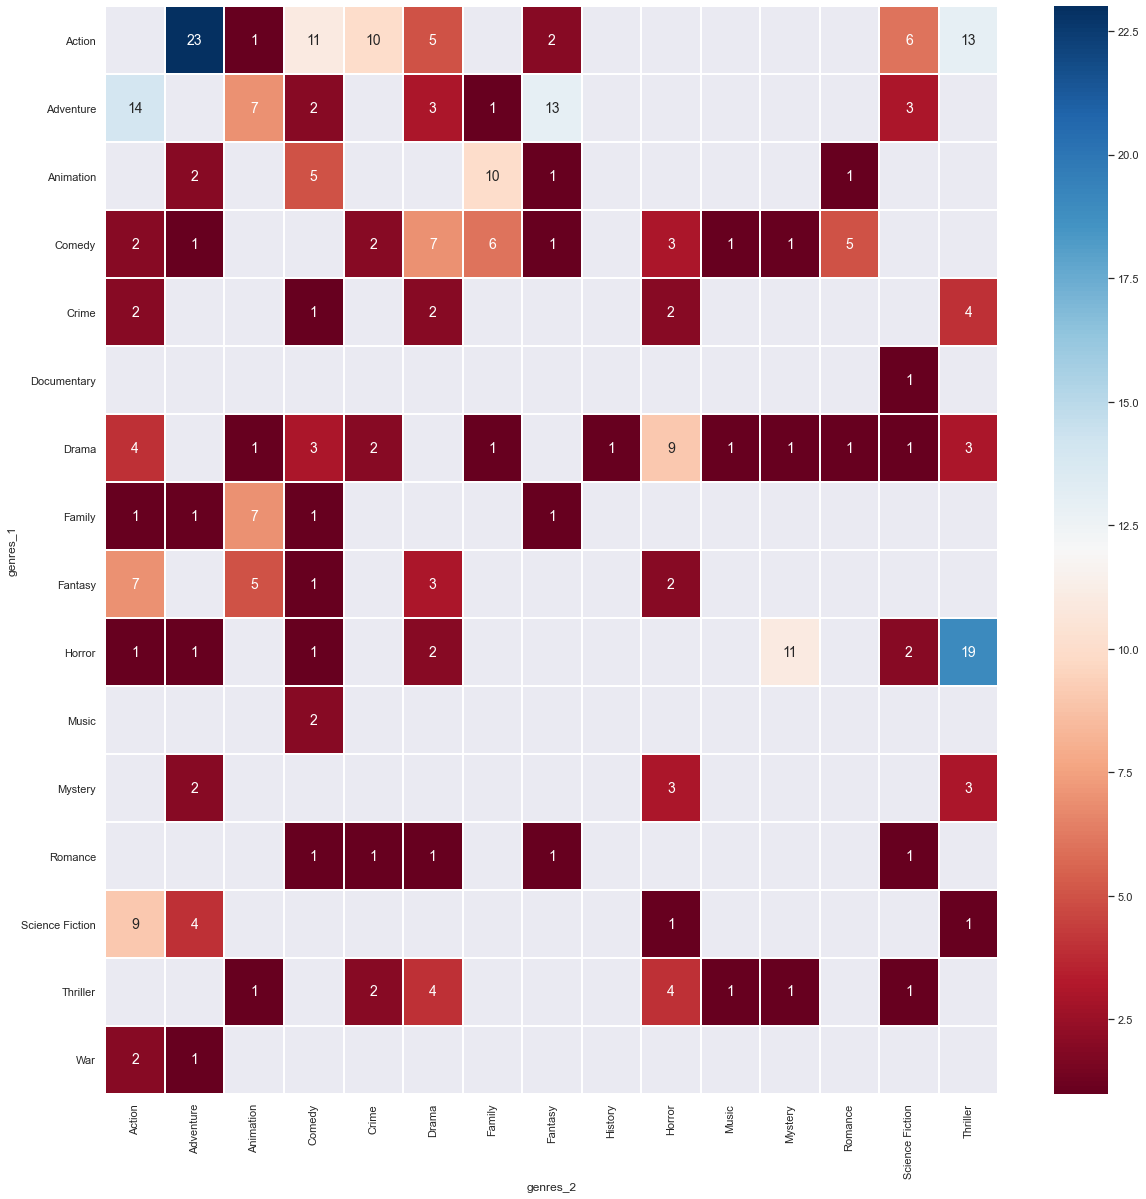

In [105]:
comb_genres = remake_cols.groupby(['genres_1', 'genres_2']).size().unstack()

f = plt.figure(figsize=(20, 20))
sb.heatmap(comb_genres, linewidths = 1, annot = True, annot_kws = {"size": 14}, cmap = "RdBu")

Movies under the genres of *Action, Adventure, Fantasy, Horror, and Thriller* tends to be popular for remake.

### Prediction

In [106]:
# Prepare train and test data for remakes
popularity = pd.DataFrame(movies_df['popularity'])  # Response
revenue_adj = pd.DataFrame(movies_df['revenue_adj'])    
is_remake = pd.DataFrame(movies_df['is_remake'])

rev_train, rev_test, rm_train, rm_test = train_test_split(revenue_adj, is_remake, test_size = 0.25)
print(f"Train Set : revenue_adj: {rev_train.shape}, is_remake: {rm_train.shape}")
print(f"Test Set : revenue_adj: {rev_test.shape} , is_remake: {rm_test.shape}")

Train Set : revenue_adj: (8148, 1), is_remake: (8148, 1)
Test Set : revenue_adj: (2717, 1) , is_remake: (2717, 1)


In [107]:
# Create decision tree classifier and train it

dectree = DecisionTreeClassifier(max_depth = 2)  
dectree.fit(rev_train, rm_train)    
rm_train_pred = dectree.predict(rev_train)
rm_test_pred = dectree.predict(rev_test)

In [108]:
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(rev_train, rm_train))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9661266568483063



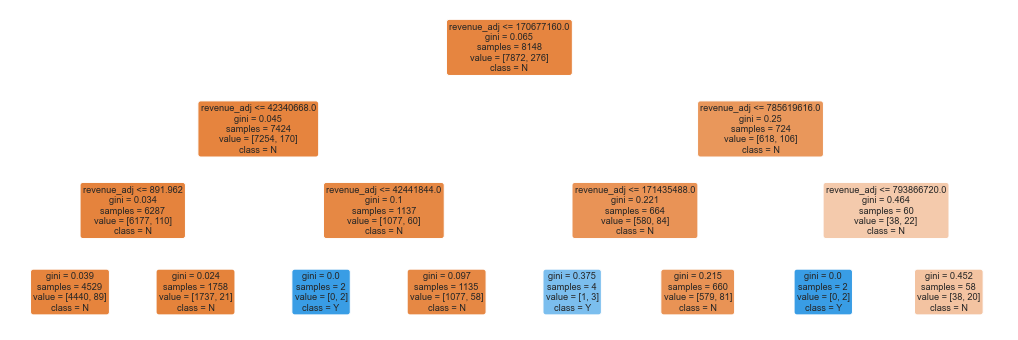

In [109]:
# Plot the trained decision tree

dectree = DecisionTreeClassifier(max_depth = 3)
dectree.fit(rev_train, rm_train)

from sklearn.tree import plot_tree

f = plt.figure(figsize=(18,6))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["revenue_adj"], 
          class_names=["N","Y"])

rm_train_pred = dectree.predict(rev_train)

<AxesSubplot:>

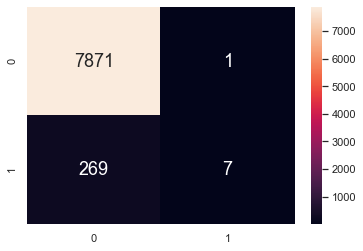

In [110]:
# Plot the Confusion Matrix for Train and Test train

sb.heatmap(confusion_matrix(rm_train, rm_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [111]:
# Get TPR/TNR, FPR/FNR & classification accuracy of train data

cm = confusion_matrix(rm_train, rm_train_pred)
train_tn = cm[0][0]
train_fp = cm[0][1]
train_fn = cm[1][0]
train_tp = cm[1][1]

def get_TrueRates(TP,TN,FP,FN):
    return TP/(TP+FN), TN/(TN+FP) # TPR, TNR
def get_FalseRates(TP,TN,FP,FN):
    return FP/(TN+FP), FN/(FN+TP) # FPR, FNR
def get_ClassificationAccuracy(TP,TN,FP,FN):
    return (TP+TN)/(TP+FP+FN+TN)

train_tpr, train_tnr = get_TrueRates(train_tp,train_tn,train_fp,train_fn)
train_fpr, train_fnr = get_FalseRates(train_tp,train_tn,train_fp,train_fn)
train_acc = get_ClassificationAccuracy(train_tp,train_tn,train_fp,train_fn)
print(f"True Positive Rate:\t\t{train_tpr}")
print(f"True Negative Rate:\t\t{train_tnr}")
print(f"False Positive Rate:\t\t{train_fpr}")
print(f"False Negative Rate:\t\t{train_fnr}")

print(f"Classification Accuracy:\t{train_acc}")

True Positive Rate:		0.025362318840579712
True Negative Rate:		0.9998729674796748
False Positive Rate:		0.00012703252032520327
False Negative Rate:		0.9746376811594203
Classification Accuracy:	0.9668630338733432


<AxesSubplot:>

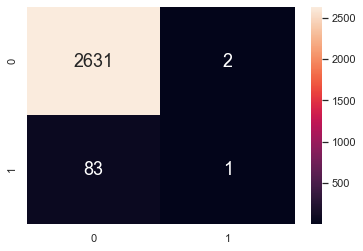

In [112]:
# Plot the Confusion Matrix for Train and Test train

rm_test_pred = dectree.predict(rev_test)
sb.heatmap(confusion_matrix(rm_test, rm_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [113]:
# Get TPR/TNR, FPR/FNR & classification accuracy of train data

cm = confusion_matrix(rm_test, rm_test_pred)
test_tn = cm[0][0]
test_fp = cm[0][1]
test_fn = cm[1][0]
test_tp = cm[1][1]

test_tpr, test_tnr = get_TrueRates(test_tp,test_tn,test_fp,test_fn)
test_fpr, test_fnr = get_FalseRates(test_tp,test_tn,test_fp,test_fn)
test_acc = get_ClassificationAccuracy(test_tp,test_tn,test_fp,test_fn)
print(f"True Positive Rate:\t\t{test_tpr}")
print(f"True Negative Rate:\t\t{test_tnr}")
print(f"False Positive Rate:\t\t{test_fpr}")
print(f"False Negative Rate:\t\t{test_fnr}")

print(f"Classification Accuracy:\t{test_acc}")

True Positive Rate:		0.011904761904761904
True Negative Rate:		0.9992404101785036
False Positive Rate:		0.0007595898214963919
False Negative Rate:		0.9880952380952381
Classification Accuracy:	0.9687154950312845


Best model for prediction would be with TPR and TNR is high while FPR and FNR is low. Hence is_remake is not a good option for prediction, but still we will regress it with another column popularity to come out with the revenue to check if they make any difference

In [114]:
# Format categorical data into 0 and 1 to perform linear regression

movies_df['is_remake'] = movies_df['is_remake'].astype('category')
movies_df['is_remake'] = movies_df['is_remake'].cat.reorder_categories(['Y', 'N'], ordered=True)
movies_df['is_remake'] = movies_df['is_remake'].cat.codes
print(movies_df['is_remake'])

0        0
1        0
2        0
3        0
4        0
        ..
10861    1
10862    1
10863    1
10864    1
10865    1
Name: is_remake, Length: 10865, dtype: int8


In [118]:
# reset train and test data for linear regression
predictors =  ["is_remake", "popularity"]
revenue_adj = pd.DataFrame(movies_df["revenue_adj"])  # Response
is_remake = pd.DataFrame(movies_df[predictors])      # Predictor
rev_train, rev_test, rm_train, rm_test = train_test_split(revenue_adj, is_remake, test_size = 0.25)

In [120]:
linreg = LinearRegression()
linreg.fit(rm_train, rev_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [1.03993272e+08]
Coefficients 	: a =  [[-1.11212902e+08  8.55232588e+07]]


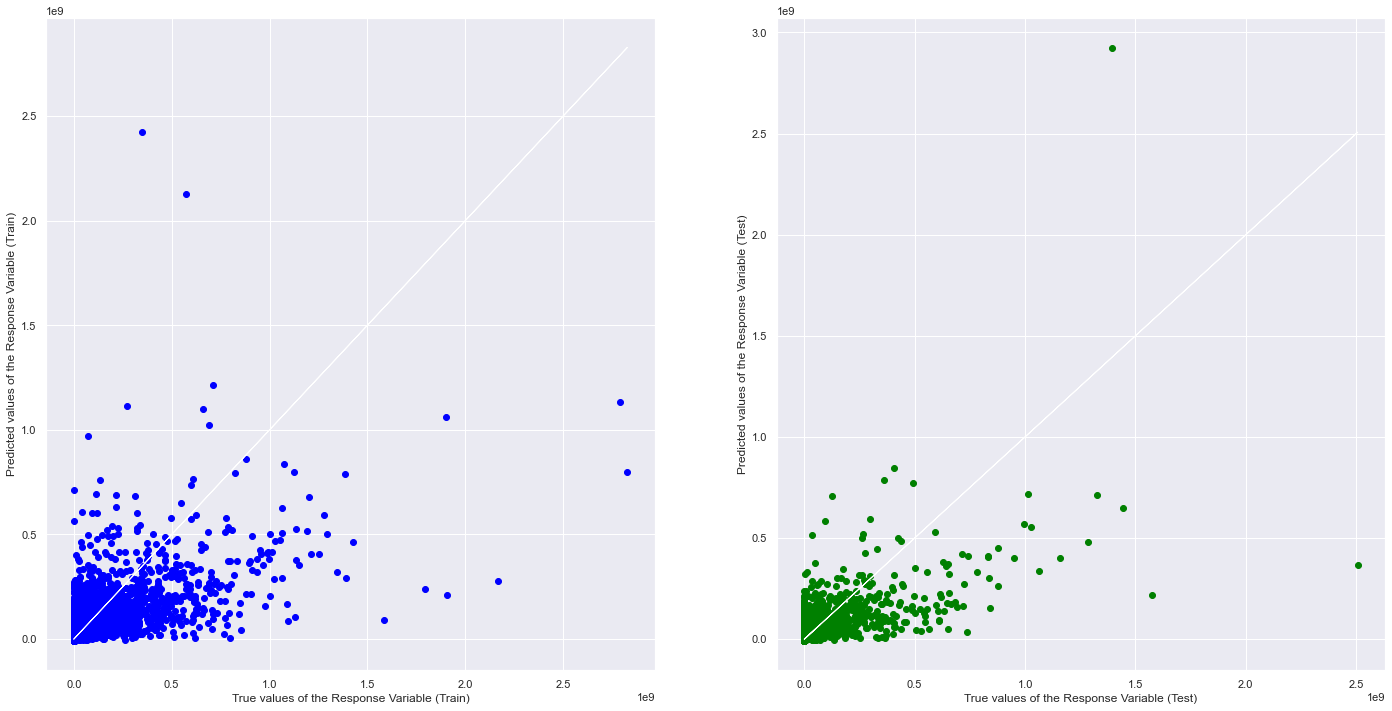

In [121]:
rev_train_pred = linreg.predict(rm_train)
rev_test_pred = linreg.predict(rm_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(rev_train, rev_train_pred, color = "blue")
axes[0].plot(rev_train, rev_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(rev_test, rev_test_pred, color = "green")
axes[1].plot(rev_test, rev_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [123]:
movie_pred = movies_df[movies_df["original_title"].isin(["Titanic", "Inception", "Toy Story 2", "Death Race", "The Omen"])]
movie_pred

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,is_remake,inflation_rate,year_difference,genres_1,genres_2
26,10483,tt0452608,1.58,45000000,73762516,Death Race,Jason Statham|Joan Allen|Ian McShane|Tyrese Gi...,http://www.deathracemovie.net/,Paul W.S. Anderson,Get ready for a killer race.,...,743,5.90,2008,"45,575,398.52","74,705,690.28",0,nan,33.00,Action,Thriller
287,806,tt0466909,0.73,25000000,119188334,The Omen,Liev Schreiber|Julia Stiles|Seamus Davey-Fitzp...,http://www.theomenmovie.com/,John Moore,A new generation of terror,...,154,5.20,2006,"27,041,728.96","128,922,344.92",0,nan,nan,Drama,Horror
334,863,tt0120363,1.81,90000000,485015179,Toy Story 2,Tom Hanks|Tim Allen|Kelsey Grammer|Joan Cusack...,http://toystory.disney.com/toy-story-2,John Lasseter|Lee Unkrich|Ash Brannon,The toys are back!,...,2272,7.20,1999,"117,814,756.19","634,910,500.71",0,nan,nan,Animation,Comedy
4549,27205,tt1375666,9.36,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,http://inceptionmovie.warnerbros.com/,Christopher Nolan,Your mind is the scene of the crime.,...,9767,7.90,2010,"160,000,000.00","825,500,000.00",1,nan,nan,Action,Thriller
9350,794,tt0075005,1.00,2800000,60922980,The Omen,Gregory Peck|Lee Remick|David Warner|Billie Wh...,NaN,Richard Donner,It is the greatest mystery of all because no h...,...,203,6.90,1976,"10,728,754.48","233,438,462.35",1,nan,nan,Horror,Thriller
10051,597,tt0120338,4.36,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,http://www.titanicmovie.com/menu.html,James Cameron,Nothing on Earth could come between them.,...,4654,7.30,1997,"271,692,064.21","2,506,405,735.42",1,nan,nan,Drama,Romance
10052,2699,tt0115392,0.22,13000000,0,Titanic,Peter Gallagher|George C. Scott|Catherine Zeta...,NaN,Robert Lieberman,NaN,...,21,6.10,1996,"18,072,817.61",0.00,1,nan,nan,Action,Drama


In [124]:

X_pred = pd.DataFrame(movie_pred[predictors])

In [125]:
y_pred = linreg.predict(X_pred)
y_pred

array([[2.39383347e+08],
       [1.66232994e+08],
       [2.58807218e+08],
       [7.93589633e+08],
       [7.82534263e+07],
       [3.65252891e+08],
       [1.15410938e+07]])

In [126]:
y_pred = pd.DataFrame(y_pred, columns = ["pred_revenue"], index = movie_pred.index)
movie_predcheck = pd.concat([movie_pred[["original_title", "popularity", "is_remake", "revenue_adj"]], y_pred], axis = 1)
movie_predcheck

,original_title,popularity,is_remake,revenue_adj,pred_revenue
26,Death Race,1.58,0,"74,705,690.28","239,383,346.79"
287,The Omen,0.73,0,"128,922,344.92","166,232,994.39"
334,Toy Story 2,1.81,0,"634,910,500.71","258,807,218.28"
4549,Inception,9.36,1,"825,500,000.00","793,589,633.43"
9350,The Omen,1.00,1,"233,438,462.35","78,253,426.31"
10051,Titanic,4.36,1,"2,506,405,735.42","365,252,891.40"
10052,Titanic,0.22,1,0.00,"11,541,093.80"


Intercept 	: b =  [2.01563928e+08]
Coefficients 	: a =  [[-1.55994662e+08]]


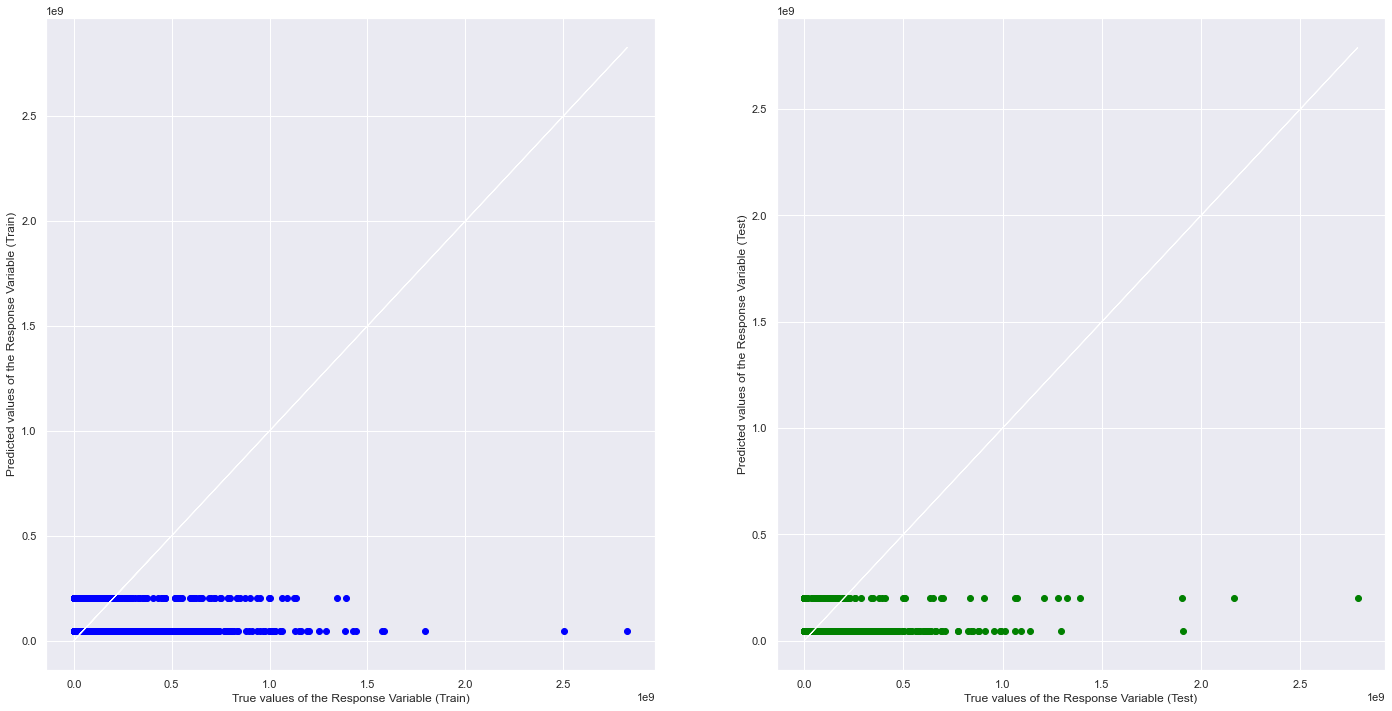

,original_title,is_remake,revenue_adj,pred_revenue
17,Cinderella,0,"498,963,025.22","201,563,928.23"
2219,Cinderella,1,0.00,"45,569,265.88"
4549,Inception,1,"825,500,000.00","45,569,265.88"
10051,Titanic,1,"2,506,405,735.42","45,569,265.88"
10052,Titanic,1,0.00,"45,569,265.88"


In [128]:
# reset train and test data for linear regression
predictors =  ["is_remake"]
revenue_adj = pd.DataFrame(movies_df["revenue_adj"])  # Response
is_remake = pd.DataFrame(movies_df[predictors])      # Predictor
rev_train, rev_test, rm_train, rm_test = train_test_split(revenue_adj, is_remake, test_size = 0.25)

linreg = LinearRegression()
linreg.fit(rm_train, rev_train)
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

rev_train_pred = linreg.predict(rm_train)
rev_test_pred = linreg.predict(rm_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(rev_train, rev_train_pred, color = "blue")
axes[0].plot(rev_train, rev_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(rev_test, rev_test_pred, color = "green")
axes[1].plot(rev_test, rev_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

movie_pred = movies_df[movies_df["original_title"].isin(["Titanic", "Inception", "Cinderella"])]
movie_pred

X_pred = pd.DataFrame(movie_pred[predictors])
y_pred = linreg.predict(X_pred)
y_pred

y_pred = pd.DataFrame(y_pred, columns = ["pred_revenue"], index = movie_pred.index)
movie_predcheck = pd.concat([movie_pred[["original_title", "is_remake", "revenue_adj"]], y_pred], axis = 1)
movie_predcheck

In [ ]:
# take note is remake 0 is a remake while 1 is not a remake